In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.drop('customerID', axis=1, inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
# size of the data
df.size

140860

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [6]:
# Check if there are any missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check Cardinality of the data
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# Fill the empty values in the TotalCharges variable by multiplying the tenure and MonthlyCharges values
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

In [10]:
# Check categorical and numerical values
def filter_data_types(df):
    cat = []
    num = []
    for i in df.columns:
        if df[i].dtype == 'object':
            cat.append(i)
        else:
            num.append(i)
    return cat, num

cat, num = filter_data_types(df)

print('Categorical Columns:', cat)
print('Numerical Columns:', num)

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [11]:
# Unique values in the categorical columns
for i in df[cat]:
    print(f'{i}: {df[i].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [12]:
# MuliipleLines column has 'No phone service' value which is same as 'No' value
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

# Replace 'No internet service' with 'No' in the following columns
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in columns_to_replace:
    df[i] = df[i].replace('No internet service', 'No')

Visualization - Churn

In [13]:
churn_counts = df['Churn'].value_counts()

fig_1 = px.pie(df, names='Churn', title='Churn Rate', color_discrete_sequence=px.colors.qualitative.Set1)
fig_1.show()

In [14]:
# Define a function that gives the distribution of variables, their relationship with the target variable and probability of churn
def analyze_category(df, category_colum, target_colum='Churn'):
    # Pie chart for the distribution of the category
    category_counts = df[category_colum].value_counts()
    fig = px.pie(df, names=category_colum, title=f'{category_colum} Distribution', color_discrete_sequence=px.colors.qualitative.Set1)
    fig.show()

    # Churn probability for each category
    category_churn_prob = df.groupby(category_colum)[target_colum].value_counts(normalize=True)*100
    for i in df[category_colum].unique():
        churn_rate = category_churn_prob[i]['Yes'] if 'Yes' in category_churn_prob[i] else 0
        print(f'Churn Probability for {i}: {churn_rate:.2f}%')

    # Histogram
    fig = px.histogram(df, x=category_colum, color=target_colum, barmode='group', title=f'{category_colum} vs Churn')
    fig.show()

    # Grouping
    grouped_data = df.groupby([category_colum, target_colum]).size().reset_index(name='Count')

    # Bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_colum, y='Count', hue=target_colum, data=grouped_data)
    plt.title(f'No of people with or without churn by {category_colum} type')
    plt.xlabel(category_colum)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Gender Rate

In [15]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Churn Probability for Female: 26.92%
Churn Probability for Male: 26.16%


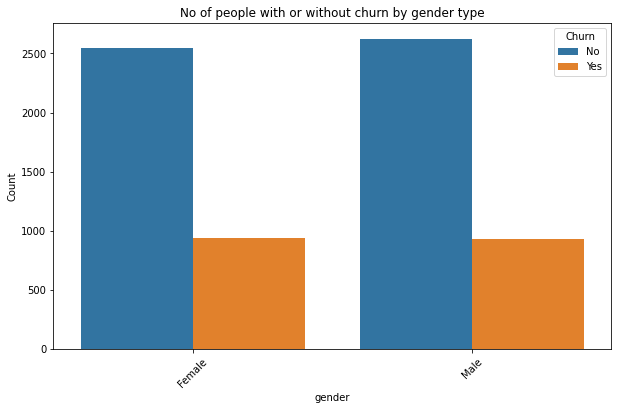

In [16]:
analyze_category(df,'gender')

Senior Citizen Rate

In [17]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
analyze_category(df, 'SeniorCitizen')

Churn Probability for 0: 23.61%
Churn Probability for 1: 41.68%


Partner Rate

In [19]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Churn Probability for Yes: 19.66%
Churn Probability for No: 32.96%


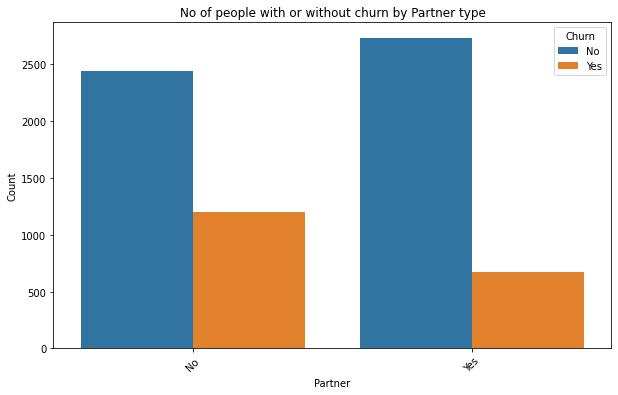

In [20]:
analyze_category(df, 'Partner')

Dependents Rate

In [21]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Churn Probability for No: 31.28%
Churn Probability for Yes: 15.45%


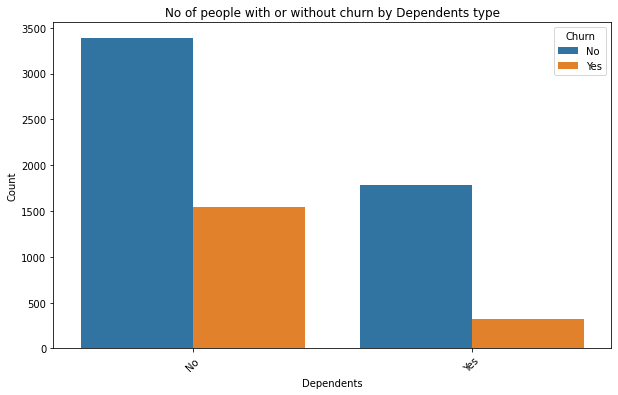

In [22]:
analyze_category(df, 'Dependents')

Phone Service Rate

In [23]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Churn Probability for No: 24.93%
Churn Probability for Yes: 26.71%


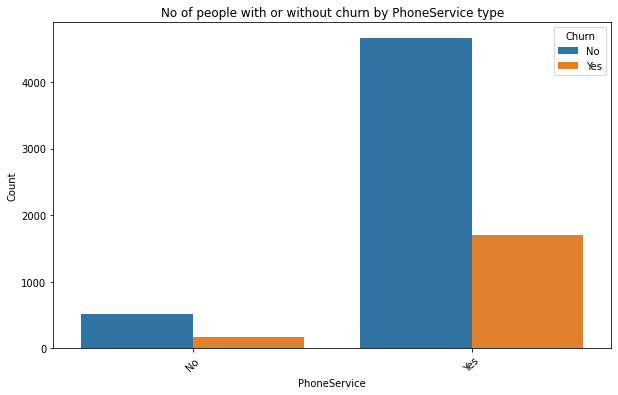

In [24]:
analyze_category(df, 'PhoneService')

Multiple Lines Rate

In [25]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

Churn Probability for No: 25.02%
Churn Probability for Yes: 28.61%


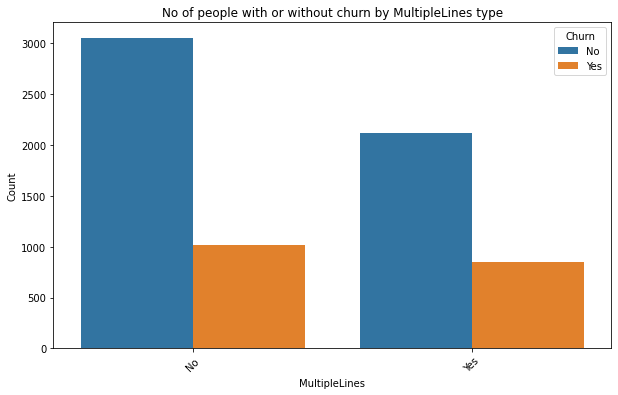

In [26]:
analyze_category(df, 'MultipleLines')

Internet Service Rate

In [27]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Churn Probability for DSL: 18.96%
Churn Probability for Fiber optic: 41.89%
Churn Probability for No: 7.40%


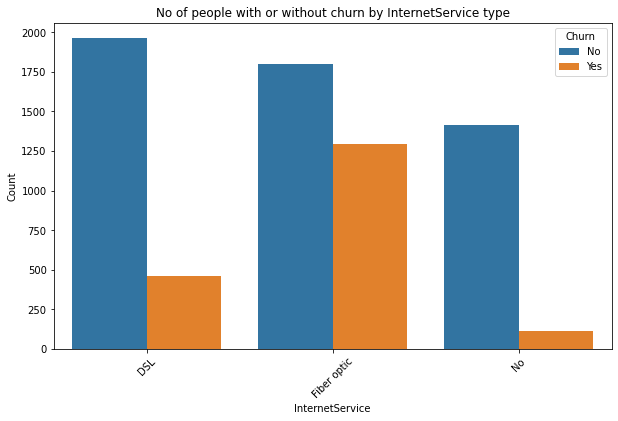

In [28]:
analyze_category(df, 'InternetService')

Online Security Rate

In [29]:
df['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

Churn Probability for No: 31.33%
Churn Probability for Yes: 14.61%


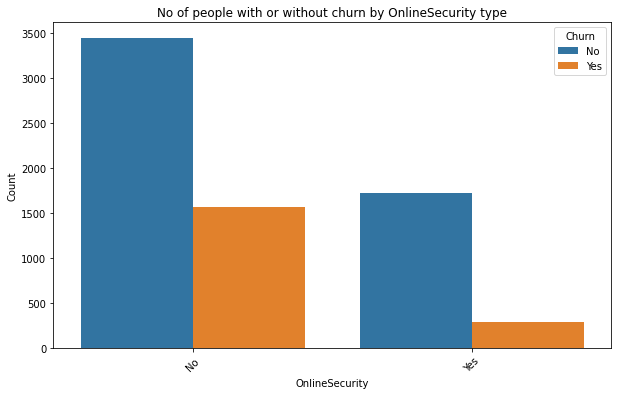

In [30]:
analyze_category(df, 'OnlineSecurity')

Online Backup Rate

In [31]:
df['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

Churn Probability for Yes: 21.53%
Churn Probability for No: 29.17%


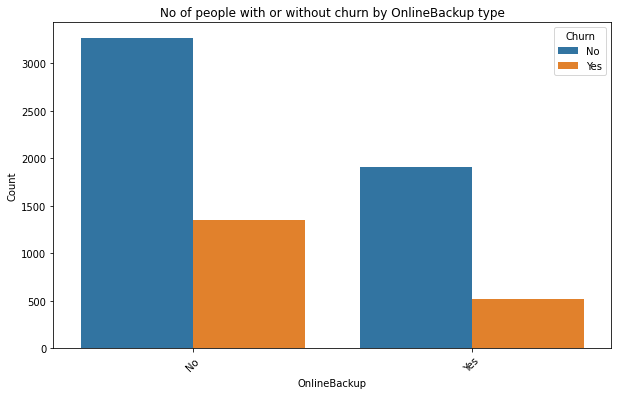

In [32]:
analyze_category(df, 'OnlineBackup')

Device Protection Rate

In [33]:
df['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

Churn Probability for No: 28.65%
Churn Probability for Yes: 22.50%


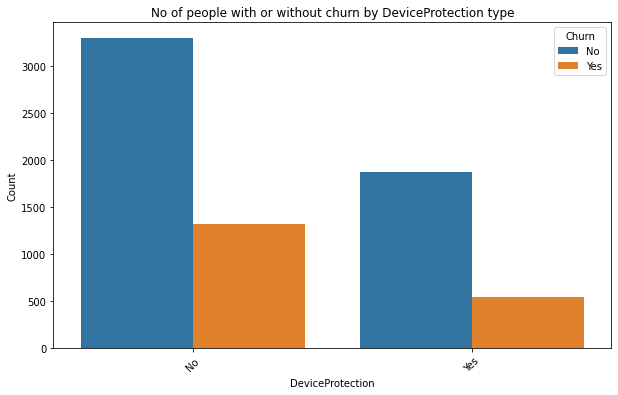

In [34]:
analyze_category(df, 'DeviceProtection')

Tech Support Rate

In [35]:
df['TechSupport'].value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [36]:
analyze_category(df, 'TechSupport')

Churn Probability for No: 31.19%
Churn Probability for Yes: 15.17%


Streaming TV Rate

In [37]:
df['StreamingTV'].value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

Churn Probability for No: 24.33%
Churn Probability for Yes: 30.07%


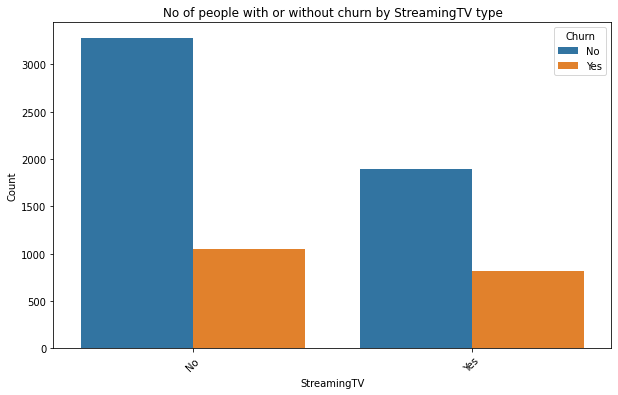

In [38]:
analyze_category(df, 'StreamingTV')

Contract Distribution Rate

In [39]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Churn Probability for Month-to-month: 42.71%
Churn Probability for One year: 11.27%
Churn Probability for Two year: 2.83%


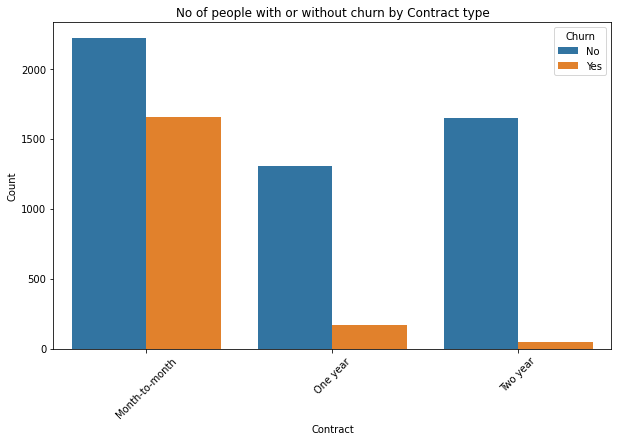

In [40]:
analyze_category(df, 'Contract')

Paperless Billing Rate

In [41]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Churn Probability for Yes: 33.57%
Churn Probability for No: 16.33%


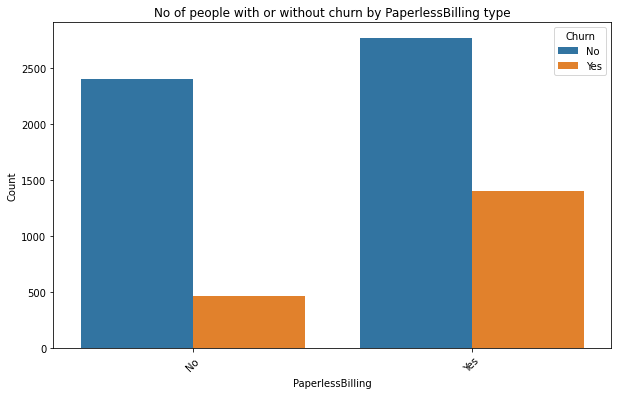

In [42]:
analyze_category(df, 'PaperlessBilling')

Payment Method Rate

In [43]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Churn Probability for Electronic check: 45.29%
Churn Probability for Mailed check: 19.11%
Churn Probability for Bank transfer (automatic): 16.71%
Churn Probability for Credit card (automatic): 15.24%


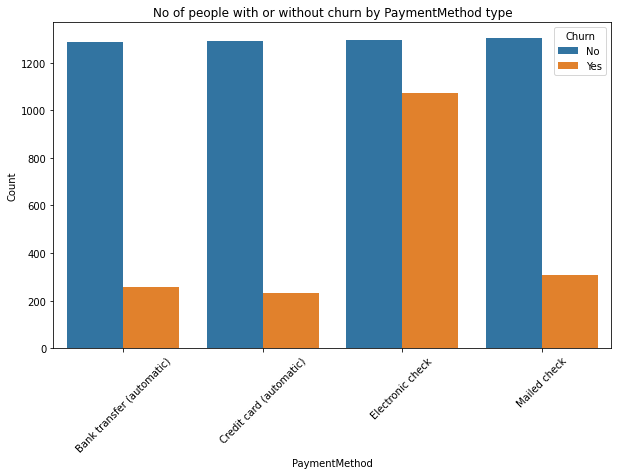

In [44]:
analyze_category(df, 'PaymentMethod')

Tenure, Monthly Charges, Total Charges Distribution

In [45]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].iplot(kind='histogram', subplots=True, bins=50)